In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


# Simple Regression

Our independent variable is danceability 


Our dependent variable is song_popularity

In [39]:
from sklearn import linear_model
y = df['song_popularity']
X = df[['danceability']]

In [40]:
model = linear_model.LinearRegression().fit(X, y)

In [41]:
from sklearn.metrics import r2_score
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)
intercept = model.intercept_
slope = model.coef_[0]

print("R-squared:", r_squared)
print("Intercept:", intercept)
print("Slope:", slope)

R-squared: 0.010876433651685002
Intercept: 43.75957444652067
Slope: 14.576980359850884


### Dealing with residuals

<Axes: xlabel='song_popularity', ylabel='Density'>

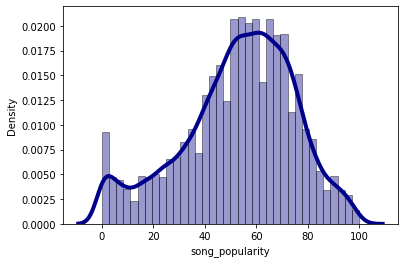

In [42]:
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
sns.distplot(df['song_popularity'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [50]:
#still not understandable if the curve is skewed or not

df['song_popularity'].skew() 

-0.501487468097605

<Axes: xlabel='danceability', ylabel='Density'>

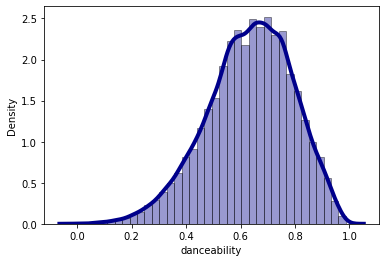

In [43]:
import seaborn as sns
sns.distplot(df['danceability'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

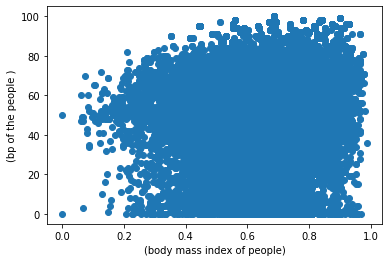

In [62]:

# Scatter plot
fig, ax = plt.subplots(figsize = (6,4))
ax.scatter(df['danceability'],df['song_popularity'])
 
# x-axis label
ax.set_xlabel('danceability')
 
# y-axis label
ax.set_ylabel('song_popularity')
plt.show()


In [44]:
#residuals = y - y_pred
#z_scores = [(x - np.mean(residuals)) / np.std(residuals)for x in residuals]
#z_scores = (residuals - np.mean(residuals) / np.std(residuals))
#z_scores

[1.0103105025549106,
 0.6582186094185216,
 0.98676046330801,
 1.086322290158581,
 0.2627657443434185,
 1.4520631506800235,
 1.3206508036082878,
 1.0697301171781723,
 1.4426956091140375,
 1.3467460979706778,
 1.1508280205287613,
 0.5512921768534732,
 1.0010785408049196,
 1.2958937294696102,
 0.8775555407754029,
 1.3397838372201258,
 0.8094418891820709,
 0.5896982183772042,
 1.1464110148936988,
 1.2529351024948214,
 0.9518267631914354,
 1.4329257225841256,
 -1.7585198741145485,
 0.449185094887413,
 1.1229921609787337,
 1.1779947699669329,
 -1.017801796837613,
 1.3174364383809425,
 1.3805995540433509,
 0.7726408330299827,
 -1.8931465864136297,
 1.11496283963646,
 0.6343974105396306,
 1.1007759474714855,
 0.9872939936038709,
 1.0040217464002748,
 -1.7934491797470633,
 0.9748476666265347,
 0.9491547172280705,
 1.2837141676402044,
 0.7869589105268923,
 0.3808002836620905,
 0.9083346059207859,
 0.8771575902955371,
 0.6726678722473667,
 0.9195782924904048,
 0.34613774317750656,
 1.043630428331

# Multiple Regression

In [45]:
from sklearn import linear_model
y = df['song_popularity']
X = df[['song_duration_ms','danceability','energy','acousticness']]

In [46]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [47]:
from sklearn.metrics import r2_score
y_pred = regr.predict(X)
r_squared = r2_score(y, y_pred)
r_squared

0.015383930609290997

In [48]:
coefficients = regr.coef_
intercept = regr.intercept_
print(coefficients)
print(intercept)

[-4.66029452e-06  1.24490622e+01 -6.32103782e+00 -6.91281858e+00]
51.988487143172655


In [49]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     73.55
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           5.91e-62
Time:                        16:36:24   Log-Likelihood:                -84718.
No. Observations:               18835   AIC:                         1.694e+05
Df Residuals:                   18830   BIC:                         1.695e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               51.9885      1.283     40.515      0.000      49.473      54.504
song_duration_ms  -4.66e-06   2.68e-06     -1.739      0.082   -9.91e-06    5.92e-07
danceability        12.4491      1.041     11.954      0.000      10.408      14.490
energy              -6.3210      0.994     -6.362      0.000      -8.268      -4.374
acousticness        -6.9128      0.750     -9.212      0.000      -8.384      -5.442
==============================================================================
Omnibus:                      835.020   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.046
Skew:                          -0.544   Prob(JB):                    1.01e-205
Kurtosis:                       2.861   Cond. No.                     2.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""